In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malware-detection/Malware dataset.csv


In [2]:
raw_data = pd.read_csv("/kaggle/input/malware-detection/Malware dataset.csv")
print(raw_data.shape)
raw_data.head()

(100000, 35)


,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [3]:
raw_data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

Based on the characteristics of the observations, the dataset was created in a Unix / Lunix-based
virtual machine for classification purposes, which are harmless with malware software for Android
devices. The data set consists of 100,000 observation data and 35 features. Below is a table of
specifications and descriptions.

| Features Description 	| Properties                                                      	|
|----------------------	|-----------------------------------------------------------------	|
| hash APK/ SHA256     	| file name                                                       	|
| milisecond           	| time                                                            	|
| classification       	| malware/beign                                                   	|
| state                	| flag of unrunable/runnable/stopped tasks                        	|
| usage_counter        	| task structure usage counter                                    	|
| prio                 	| keeps the dynamic priority of a process                         	|
| static_prio          	| static priority of a process                                    	|
| normal_prio          	| priority without taking RT-inheritance into account             	|
| policy               	| planning policy of the process                                  	|
| vm_pgoff             	| the offset of the area in the file, in pages.                   	|
| vm_truncate_count    	| used to mark a vma as now dealt with                            	|
| task_size            	| size of current task.                                           	|
| cached_hole_size     	| size of free address space hole.                                	|
| free_area_cache      	| first address space hole                                        	|
| mm_users             	| address space users                                             	|
| map_count            	| number of memory areas                                          	|
| hiwater_rss          	| peak of resident set size                                       	|
| total_vm             	| total number of pages                                           	|
| shared_vm            	| number of shared pages.                                         	|
| exec_vm              	| number of executable pages.                                     	|
| reserved_vm          	| number of reserved pages.                                       	|
| nr_ptes              	| number of page table entries                                    	|
| end_data             	| end address of code component                                   	|
| last_interval        	| last interval time before thrashing                             	|
| nvcsw                	| number of volunteer context switches.                           	|
| nivcsw               	| number of in-volunteer context switches                         	|
| min_flt              	| minör page faults                                               	|
| maj_flt              	| majör page faults                                               	|
| fs_excl_counter      	| ıt holds file system exclusive resources.                       	|
| lock                 	| the read-write synchronization lock used for file system access 	|
| utime                	| user time                                                       	|
| stime                	| system time                                                     	|
| gtime                	| guest time                                                      	|
| cgtime               	| cumulative group time. Cumulative resource counter              	|
| signal_nvcsw         	| used as cumulative resource counter.                            	|


In [4]:
# read some statistics of the dataset
raw_data.describe(include="all")

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000,100000.000000,100000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
unique,100,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1119f652a5b1f04e98835e2b2ed56efe990e9073aa7dcb...,NaN,benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,499.500000,NaN,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,NaN,288.676434,NaN,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,NaN,0.000000,NaN,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,NaN,249.750000,NaN,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,NaN,499.500000,NaN,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,NaN,749.250000,NaN,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0


In [5]:
# Check the DataType of our dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

The data is already clean.

In [6]:
#Start Processing
data = raw_data

In [7]:
data["classification"].value_counts()

benign     50000
malware    50000
Name: classification, dtype: int64

In [8]:
data['classification'] = data.classification.map({'benign':0, 'malware':1})
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [9]:
# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,079277b8b6049c06806b79216901d0e9ff473bfe2c2454...,520,1,0,0,3070205952,22225,0,0,0,...,1,0,114,0,3204448256,382482,4,1,0,0
1,2e185a901298b5ec69b2b22538a1fec71a4434fa495ffb...,219,1,0,0,3069493248,22175,0,0,0,...,4,0,114,2,3204448256,381912,4,0,0,0
2,com.tangram3D.AthleticsFree.apk,340,0,1093632,0,3069411328,16565,0,0,0,...,69,1,120,18,3204448256,381827,3,12,0,0
3,079277b8b6049c06806b79216901d0e9ff473bfe2c2454...,285,1,0,0,3070205952,22225,0,0,0,...,1,0,114,0,3204448256,382477,4,1,0,0
4,4499a97e58677e7ee9fc7bd16f51b796b5fe28f87429e7...,145,1,4096,0,3069706240,22225,0,0,0,...,7,0,114,0,3204448256,382477,4,0,0,0


In [10]:
#Import drawing tools

import matplotlib.pyplot as plt
import seaborn as sns

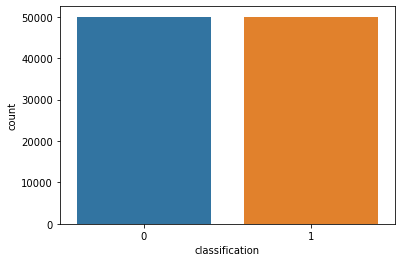

In [11]:
sns.countplot(data["classification"])
plt.show()

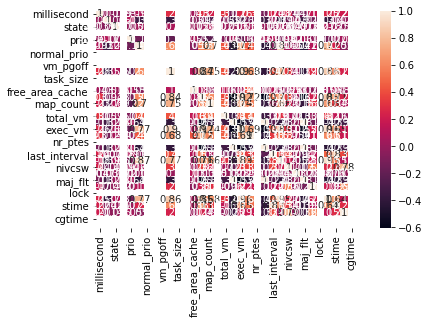

In [12]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
X = data.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
Y = data["classification"]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

Before we feed to a NN, we need to normalize the data

In [15]:
# Data normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
import tensorflow as tf

In [18]:
#Number of attributes
input_size = 27 

#Number of Outputs
output_size = 2 

# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 256
    
# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, input_shape=(input_size,), activation='tanh'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7168      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 5

In [19]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Define custom metric functions
# def precision_metric(y_true, y_pred):
#     return precision_score(y_true, y_pred, average='weighted')

# def recall_metric(y_true, y_pred):
#     return recall_score(y_true, y_pred, average='weighted')

# def f1_metric(y_true, y_pred):
#     return f1_score(y_true, y_pred, average='weighted')

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#from keras.optimizers import SGD
#opt = SGD(lr=0.01)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(optimizer = sgd, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [20]:
# set the batch size
batch_size = 200

# set a maximum number of training epochs
max_epochs = 25

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [21]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=max_epochs,
                   verbose=1,
#                    callbacks=[early_stopping],
                   validation_split=0.2)


Epoch 1/25
320/320 [==============================] - 1s 3ms/step - loss: 0.0955 - accuracy: 0.9634 - val_loss: 0.0152 - val_accuracy: 0.9946
Epoch 2/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 3/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0032 - val_accuracy: 0.9989
Epoch 4/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0011 - val_accuracy: 0.9996
Epoch 5/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.0061 - val_accuracy: 0.9983
Epoch 6/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 7/25
320/320 [==============================] - 1s 2ms/step - loss: 0.0156 - accuracy: 0.9959 - val_loss: 0.0183 - val_accuracy: 0.9964
Epoch 

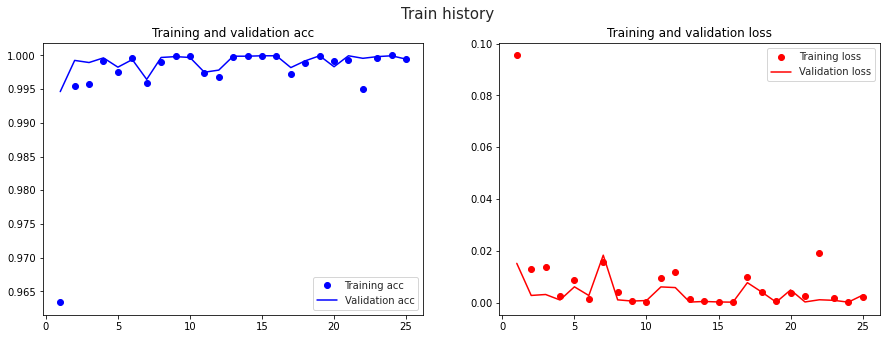

In [22]:
# Visualize the result
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Train history', size = 15)

ax1.plot(epochs, acc, "bo", label = "Training acc")
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()

ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()

plt.show()

In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9994

Test loss: 0.002681. Test accuracy: 99.935001%


Further train the model using SGD with lr=0.001

In [24]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01)
model.compile(optimizer = sgd, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [25]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=30,
                   verbose=1,
                   initial_epoch=20, #start from epoch 11
                   callbacks=[early_stopping], #prevent overfitting
                   validation_split=0.2)

Epoch 21/30
320/320 [==============================] - 1s 2ms/step - loss: 6.2194e-04 - accuracy: 0.9999 - val_loss: 0.0011 - val_accuracy: 0.9996
Epoch 22/30
320/320 [==============================] - 1s 2ms/step - loss: 3.1593e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 23/30
320/320 [==============================] - 1s 2ms/step - loss: 2.5354e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.9998


In [26]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 1s 2ms/step - loss: 6.1880e-04 - accuracy: 0.9999

Test loss: 0.000619. Test accuracy: 99.989998%
